In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date

In [2]:
customer = pd.read_csv ("C:/Users/SHRUTI/Desktop/Business Analytics material/Case Studies/Python Case Studies/4. Pandas Case Study 2 - Credit Card Case Study/Customer Acqusition.csv")
repayment = pd.read_csv ("C:/Users/SHRUTI/Desktop/Business Analytics material/Case Studies/Python Case Studies/4. Pandas Case Study 2 - Credit Card Case Study/Repayment.csv")
spend = pd.read_csv ("C:/Users/SHRUTI/Desktop/Business Analytics material/Case Studies/Python Case Studies/4. Pandas Case Study 2 - Credit Card Case Study/spend.csv")

### 1 a. In case age is less than 18, replace it with mean of age values.

In [3]:
customer['Age'] = np.where(customer['Age'] < 18, customer['Age'].mean(), customer['Age'])

### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [4]:
customer_spend = pd.merge(left=customer, right=spend,right_on='Customer', left_on='Customer', how='left')
del customer_spend['No']
del customer_spend['Sl No:']
customer_spend['Amount'] = np.where(customer_spend['Amount'] > customer_spend['Limit'], customer_spend['Limit'] * 0.5, customer_spend['Amount'])
customer_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [5]:
customer_repayment = pd.merge(left=customer, right=repayment,right_on='Customer', left_on='Customer', how='left')
customer_repayment.drop(['SL No:', 'Unnamed: 4'], axis=1, inplace=True)
customer_repayment['Amount'] = np.where(customer_repayment['Amount'] > customer_repayment['Limit'], customer_repayment['Amount'] == customer_repayment['Limit'], customer_repayment['Amount'])
del customer_repayment['No']
customer_repayment

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,0.00
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,0.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,0.00
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,0.00


### 2a. How many distinct customers exist?

In [6]:
customer_spend.Customer.nunique()

100

### b. How many distinct categories exist?

In [7]:
customer_spend.Product.nunique()

3

### c. What is the average monthly spend by customers?

In [8]:
customer_spend['Month'] = pd.to_datetime(customer_spend['Month'])
customer_spend['spend_month_only'] = customer_spend['Month'].dt.month
avg_customer_spend = customer_spend[['Customer', 'spend_month_only', 'Amount']]

avg_customer_spend.groupby(['Customer', 'spend_month_only']).mean().reset_index()

,Customer,spend_month_only,Amount
0,A1,1,372762.587143
1,A1,2,175235.690000
2,A1,4,261649.250000
3,A1,5,361141.310000
4,A1,8,344372.100000
...,...,...,...
573,A95,1,240401.500000
574,A96,1,54729.660000
575,A97,1,5000.000000
576,A98,1,5000.500000


### d. What is the average monthly repayment by customers?

In [9]:
customer_repayment['Month'] = pd.to_datetime(customer_repayment['Month'])
customer_repayment['repayment_month_only'] = customer_repayment['Month'].dt.month
avg_customer_repayment = customer_repayment[['Customer', 'repayment_month_only', 'Amount']]

avg_customer_repayment.groupby(['Customer', 'repayment_month_only']).mean().reset_index()

,Customer,repayment_month_only,Amount
0,A1,1,343972.327143
1,A1,2,156374.760000
2,A1,4,254474.580000
3,A1,7,297176.740000
4,A1,9,186427.500000
...,...,...,...
553,A95,1,369405.960000
554,A96,1,0.000000
555,A97,1,0.000000
556,A98,1,0.000000


### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [10]:
customer_profit = pd.merge(left=avg_customer_spend, right=avg_customer_repayment,left_on = ['Customer', 'spend_month_only'], right_on = ['Customer', 'repayment_month_only'])
customer_profit['monthly_profit'] = customer_profit['Amount_y'] - customer_profit['Amount_x']

customer_profit['profit'] = np.where(customer_profit['monthly_profit'] > 0, customer_profit['monthly_profit'] * 0.029, np.NaN)
customer_profit.groupby(['Customer', 'repayment_month_only'])['profit'].sum().reset_index()

,Customer,repayment_month_only,profit
0,A1,1,85906.24470
1,A1,2,49016.40552
2,A1,4,9712.14176
3,A1,11,6329.54493
4,A10,1,42664.97342
...,...,...,...
449,A95,1,3741.12934
450,A96,1,0.00000
451,A97,1,0.00000
452,A98,1,0.00000


### f. What are the top 5 product types?

In [11]:
customer_spend.groupby('Type').Amount.sum().reset_index().sort_values(by = 'Amount', ascending = False).head(5)


,Type,Amount
10,PETRO,28597384.98
4,CAMERA,27690738.44
7,FOOD,20519243.60
0,AIR TICKET,20155847.12
14,TRAIN TICKET,19995825.72


### g. Which city is having maximum spend?

In [12]:
customer_spend.groupby('City').Amount.sum().reset_index().sort_values(by = 'Amount', ascending = False).head(1)

,City,Amount
4,COCHIN,45963513.5


### h. Which age group is spending more money?

In [13]:
customer_spend['Age_cat'] = np.where(customer_spend.Age <= 18, 'Young', 
                                     np.where((customer_spend.Age >= 18) & (customer_spend.Age <= 35), 'Adult', 'Senior'))

In [14]:
customer_spend.groupby('Age_cat').Amount.sum().reset_index().sort_values(by = 'Amount', ascending = False).head(1)

,Age_cat,Amount
1,Senior,1.580136e+08


### i. Who are the top 10 customers in terms of repayment?

In [15]:
customer_repayment.groupby('Customer').Amount.sum().reset_index().sort_values(by = 'Amount', ascending = False).head(10)

,Customer,Amount
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
6,A14,7943268.63
39,A44,7744730.12
33,A39,7622483.30
37,A42,7615460.86


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [16]:
customer_spend['year'] = customer_spend['Month'].dt.year
customer_pivot = pd.pivot_table(customer_spend, values='Amount', index = 'City',
                    columns=['year', 'Product'], aggfunc=np.sum)

customer_pivot


year              2004                                 2005              \
Product           Gold    Platimum      Silver         Gold    Platimum   
City                                                                      
BANGALORE   9289878.54  1112732.30  1291852.58  12892362.99   912284.97   
BOMBAY      6987853.53   897264.94   532089.03   8983018.28   711804.94   
CALCUTTA    7477140.98  2037690.30   500006.00  10303355.80  4434696.31   
CHENNAI     1059618.50  3535652.38   282056.86   3740945.58  5053956.32   
COCHIN      7315850.15  3419904.07   814229.62  12110613.03  4960921.71   
DELHI       2806495.00   283512.89   768172.30   1964845.27   494157.86   
PATNA       2072567.90  1113069.60   756684.10   3252615.77  2883231.07   
TRIVANDRUM  2415102.84  2161676.67   209667.48   1240375.85  3601443.30   

year                          2006                          
Product        Silver         Gold    Platimum      Silver  
City                                                        
BANGALORE   830612.34  12030611.09   685831.27  1415480.94  
BOMBAY      508988.54   7917144.31   972130.01  1092833.80  
CALCUTTA    440147.06  11167532.77  3589606.66  1157956.42  
CHENNAI     377184.49   2704288.62  5024923.40   350009.50  
COCHIN      652269.38  10499142.38  4920592.29  1269990.87  
DELHI       612311.21   2957103.32   176788.72   854899.97  
PATNA       950094.19   2276181.69  1256137.65   700005.00  
TRIVANDRUM  269912.99   2735710.87  2147403.75   555862.12

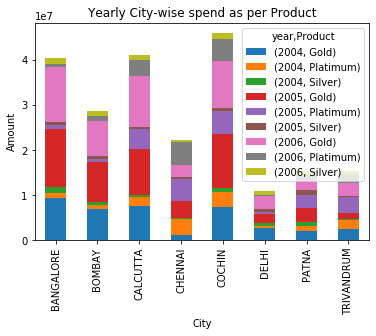

In [17]:
customer_pivot.plot(kind='bar', stacked= True)
plt.xlabel('City')
plt.ylabel('Amount')
plt.title('Yearly City-wise spend as per Product')
plt.show()

### 4a. Monthly comparison of total spends, city wise

In [18]:
customer_pivot1 = pd.pivot_table(customer_spend, values='Amount', index = 'City',
                    columns='spend_month_only', aggfunc=np.sum).T

customer_pivot1

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
spend_month_only,,,,,,,,
1,9041796.84,5948993.33,9064864.90,4466961.36,11714373.54,2714261.45,4916205.55,3704336.99
2,6734494.76,4276988.30,8150545.61,4385815.95,5747886.38,1494064.06,2353333.55,2857123.89
3,5362903.07,5227850.50,4939040.04,3183643.71,5645146.53,2267149.02,1437166.61,2392316.51
4,4207980.48,1873785.01,3457507.95,2518656.99,3882744.94,777240.75,2338179.53,1199293.45
5,6383115.13,3891945.60,5578246.87,2856199.62,6581085.69,1600322.07,2136586.80,2813534.48
6,1330685.90,1172594.97,2293045.81,1244242.16,2495745.07,511276.09,746186.13,400336.83
7,2228217.69,177726.32,2234573.27,693825.77,1290897.30,50001.50,50000.00,260484.50
8,695061.95,1066744.75,1548354.02,305875.97,2317306.61,155402.16,419383.64,453773.94
9,703018.28,1278402.79,1511713.57,745759.40,1382242.90,50001.00,70329.95,186063.70


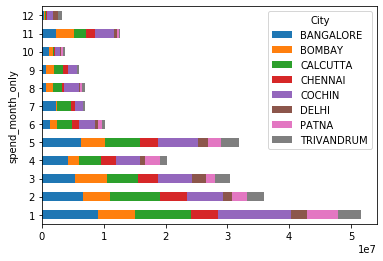

In [19]:
customer_pivot1.plot(kind='barh', stacked = True)

### b. Comparison of yearly spend on air tickets

In [20]:
customer_pivot2 = pd.pivot_table(customer_spend, values='Amount', index = 'year',
                    columns=[customer_spend['Type'][customer_spend['Type'] == 'AIR TICKET']], aggfunc=np.sum)
customer_pivot2

Type,AIR TICKET
year,
2004,4357225.35
2005,10550152.21
2006,5248469.56


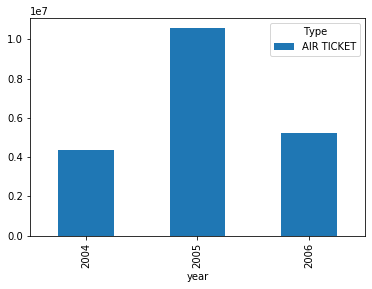

In [21]:
customer_pivot2.plot(kind='bar')

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

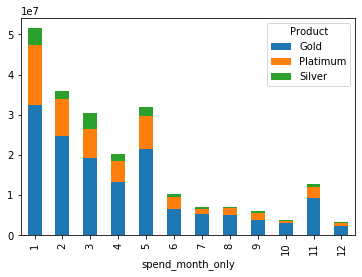

In [22]:
customer_pivot3 = pd.pivot_table(customer_spend, values='Amount', index = 'spend_month_only',
                    columns='Product', aggfunc=np.sum)

customer_pivot3.plot(kind='bar', stacked = True)

Findings: Customer spending is maximum at the starting of year and then gradually decreases through the year

### 5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.

In [27]:
customer_repayment['Monthly'] = customer_repayment['Month'].dt.month
customer_repayment['Yearly'] = customer_repayment['Month'].dt.year

In [70]:
def cust_repay(Product_type, Time_period):
    return(customer_repayment[(customer_repayment['Product'] == Product_type)].groupby(['Customer', 'Amount', Time_period]).Amount.sum().sort_values(ascending = False).head(10))

In [71]:
Product_type = input('Enter Product (Gold/Silver/Platinum): ')
Time_period = input('Enter time period (Yearly or Monthly): ')

cust_repay(Product_type, Time_period)

Enter Product (Gold/Silver/Platinum): Gold
Enter time period (Yearly or Monthly): Monthly


Customer  Amount     Monthly
A11       499930.66  4          499930.66
A13       498284.19  1          498284.19
A12       498001.25  7          498001.25
A89       497237.97  4          497237.97
A12       496791.06  2          496791.06
A27       496780.73  3          496780.73
A30       496754.84  5          496754.84
A62       496752.69  11         496752.69
A44       495947.66  2          495947.66
A1        495414.75  1          495414.75
Name: Amount, dtype: float64